<div style=" padding: 40px; text-align: center; color: #535453;">
    <h2 style="font-family: 'calibri', sans-serif;ext-align: center;  font-size: 50px; margin-top: 0; margin-bottom: 20px;">
    Flights (Descriptive Statistics)
    </h2>
</div>

The "flights.csv" dataset contains information about the flights of an airport. This dataset includes information such as departure and arrival time, delays, flight company, flight number, flight origin and destination, flight duration, distance, hour and minute of flight, and exact date and time of flight. This data cannot be used in management analysis and strategies and provide useful information about the performance of flights and placement companies.

The analysis of the data in this dataset can be used as a basis for the following activities: 
1. Analysis of time patterns and trends: by examining the departure and arrival time of the aircraft, changes and time changes, patterns and trends in flight behavior can be identified.
2. Analysis of American companies: By viewing information about airlines such as the number of flights, the impact and overall performance, you can compare and analyze the performance of each company.
3. Analysis of delays and service quality: By examining delays and arrival time, I can collect and analyze information about the quality of services provided by the airport and companies.
4. Analysis of flight routes: by checking the origin and destination of flights, distances and flight duration, popular routes and people's choices can be identified and analyzed.
5. Analysis of airport performance: by observing the characteristics of flights and airport performance, it is possible to identify and analyze the strengths and weaknesses of the airport and suggest improvements.

It provides various tools for data analysis and visualization and can be used as a basis for managerial decisions in the field of aviation industry.

**Data dictionary:**
* id: A unique identifier for each flight record in the dataset.
* year: The year in which the flight took place (2013 in this dataset).
* month: The month in which the flight took place (1 to 12).
* day: The day of the month on which the flight took place (1 to 31).
* dep_time: The actual local departure time of the flight, in 24-hour format (hhmm).
* sched_dep_time: The scheduled local departure time of the flight, in 24-hour format (hhmm).
* dep_delay: The difference between the actual and scheduled departure times of the flight, in minutes. A positive value indicates a delayed departure, while a negative value indicates an early departure.
* arr_time: The actual local arrival time of the flight, in 24-hour format (hhmm).
* sched_arr_time: The scheduled local arrival time of the flight, in 24-hour format (hhmm).
* arr_delay: The difference between the actual and scheduled arrival times of the flight, in minutes. A positive value indicates a delayed arrival, while a negative value indicates an early arrival.
* carrier: The two-letter code of the airline carrier for the flight.
* flight: The flight number of the flight.
* tailnum: The unique identifier of the aircraft used for the flight.
* origin: The three-letter code of the airport of origin for the flight.
* dest: The three-letter code of the destination airport for the flight.
* air_time: The duration of the flight, in minutes.
* distance: The distance between the origin and destination airports, in miles.
* hour: The hour component of the scheduled departure time, in local time.
* minute: The minute component of the scheduled departure time, in local time.
* time_hour: The scheduled departure time of the flight, in local time and format (yyyy-mm-dd hh:mm:ss).
* name: The name of the airline carrier for the flight.

<h1 style="padding-top:50px"><p style="background-color:#000;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
Importing Libraries
</p></h1>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('flights.csv')
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


* The dataset contains __336,776 entries__ (rows) and __21 columns__.
    
    
* The columns are of different data types: 
    - integer (int64)
    - float (float64)
    - object (usually representing string or categorical data).
    
    
* The dataset contains some __missing values__. Specifically, the columns `dep_time`, `dep_delay`, `arr_time`, `arr_delay`, `tailnum`, and `air_time` have a certain number of non-null entries, indicating that there are some missing values in these columns.

In [3]:
df['tailnum'].value_counts()

tailnum
N725MQ    575
N722MQ    513
N723MQ    507
N711MQ    486
N713MQ    483
         ... 
N7ASAA      1
N932DN      1
N318AS      1
N651UA      1
N557AS      1
Name: count, Length: 4043, dtype: int64

In [4]:
df['flight'].value_counts()

flight
15      968
27      898
181     882
301     871
161     786
       ... 
3464      1
1226      1
3136      1
4953      1
3539      1
Name: count, Length: 3844, dtype: int64

In [5]:
drop_array = ['id', 'year', 'name', 'hour', 'minute', 'time_hour']
df.drop(columns=drop_array, inplace=True)

In [6]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327341,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209
327342,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301
327343,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264
327344,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187


In [7]:
df.describe()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance
count,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000
mean,6.564803,15.740825,1348.789883,1340.335098,12.555156,1501.908238,1532.788426,6.895377,1943.104501,150.686460,1048.371314
std,3.413444,8.777376,488.319979,467.413156,40.065688,532.888731,497.979124,44.633292,1621.523684,93.688305,735.908523
min,1.000000,1.000000,1.000000,500.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,80.000000
25%,4.000000,8.000000,907.000000,905.000000,-5.000000,1104.000000,1122.000000,-17.000000,544.000000,82.000000,509.000000
50%,7.000000,16.000000,1400.000000,1355.000000,-2.000000,1535.000000,1554.000000,-5.000000,1467.000000,129.000000,888.000000
75%,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1944.000000,14.000000,3412.000000,192.000000,1389.000000
max,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000


In [8]:
print(df.dtypes)

month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object


<h1 style="padding-top:50px"><p style="background-color:#000;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;width:400px;">
EDA
</p></h1>

In [9]:
df[df["month"] == 1]["arr_delay"].mean()

6.129971967573301

In [10]:
df[df["month"] == 1]["dep_delay"].mean()

9.985491325100387

In [11]:
df.pivot_table(
    ["dep_delay", "arr_delay"],
    ["month"],
    aggfunc = "mean",
)

,arr_delay,dep_delay
month,,
1,6.129972,9.985491
2,5.613019,10.760239
3,5.807577,13.164289
4,11.176063,13.849187
5,3.521509,12.891709
6,16.481330,20.725614
7,16.711307,21.522179
8,6.040652,12.570524
9,-4.018364,6.630285


In [12]:
df["month"].value_counts()

month
8     28756
10    28618
7     28293
5     28128
3     27902
4     27564
6     27075
12    27020
9     27010
11    26971
1     26398
2     23611
Name: count, dtype: int64

In [13]:
df.apply(np.max)

month                 12
day                   31
dep_time          2400.0
sched_dep_time      2359
dep_delay         1301.0
arr_time          2400.0
sched_arr_time      2359
arr_delay         1272.0
carrier               YV
flight              8500
tailnum           N9EAMQ
origin               LGA
dest                 XNA
air_time           695.0
distance            4983
dtype: object

In [14]:
flights_per_day = pd.crosstab(df["month"], df["day"])
flights_per_day.style.highlight_max(axis=None)

day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,831,928,900,908,717,829,930,892,893,929,917,681,807,923,881,853,915,910,671,781,902,885,888,908,879,671,806,857,869,796,841
2,908,677,794,918,877,892,925,455,291,801,848,884,901,952,946,736,830,941,927,933,936,937,736,869,944,897,903,953,0,0,0
3,944,754,907,957,933,791,881,798,752,902,974,901,963,980,970,761,898,925,926,957,972,972,760,889,891,966,974,976,970,766,892
4,959,980,988,978,979,767,907,969,958,861,953,914,766,910,988,923,948,948,872,754,918,937,923,932,960,978,755,909,977,953,0
5,962,971,963,738,908,974,948,893,965,968,703,889,972,948,946,980,980,746,900,964,948,911,756,944,724,728,925,967,964,979,964
6,749,821,956,956,958,963,905,772,904,942,962,953,881,962,792,916,977,912,973,987,986,805,912,871,950,942,886,864,791,827,0
7,877,925,971,733,818,779,878,954,969,846,932,983,790,924,991,982,986,971,977,784,903,858,896,984,980,984,804,856,978,986,994
8,931,979,793,919,997,986,994,929,931,803,924,991,932,988,994,989,777,906,988,984,981,946,983,771,900,973,958,911,972,954,672
9,712,841,943,937,966,962,686,902,988,957,913,765,972,681,891,983,958,969,965,980,690,896,987,949,964,992,990,675,910,986,0


In [15]:
df.pivot_table(
    ["dep_delay", "arr_delay"],
    ["carrier"],
    aggfunc = "mean",
)

,arr_delay,dep_delay
carrier,,
9E,7.379669,16.439574
AA,0.364291,8.569130
AS,-9.930889,5.830748
B6,9.457973,12.967548
DL,1.644341,9.223950
EV,15.796431,19.838929
F9,21.920705,20.201175
FL,20.115906,18.605984
HA,-6.915205,4.900585


In [16]:
len(df[(df['dep_delay'] > 0) & (df['arr_delay'] > 0)]) / len(df) * 100

28.19738136406127

In [17]:
len(df[(df['dep_delay'] > 0) | (df['arr_delay'] > 0)]) / len(df) * 100

51.4580902164682

In [18]:
print(stats.describe(df['arr_delay']))

DescribeResult(nobs=327346, minmax=(-86.0, 1272.0), mean=6.89537675731489, variance=1992.13072710194, skewness=3.716800448835242, kurtosis=29.232579155522792)


In [19]:
stats.trim_mean(df['arr_delay'], 0.1)

-1.0312244632997045

In [20]:
stats.trim_mean(df['dep_delay'], 0.1)

3.2757772703319867

In [21]:
print(stats.describe(df['distance']))

DescribeResult(nobs=327346, minmax=(80, 4983), mean=1048.3713135336923, variance=541561.3544229562, skewness=1.1133875189157485, kurtosis=1.1490825689271036)


In [22]:
origin_dest = pd.crosstab(df["origin"], df["dest"])
origin_dest_style = origin_dest.style.highlight_max(axis=None)
origin_dest_style

dest,ABQ,ACK,ALB,ANC,ATL,AUS,AVL,BDL,BGR,BHM,BNA,BOS,BQN,BTV,BUF,BUR,BWI,BZN,CAE,CAK,CHO,CHS,CLE,CLT,CMH,CRW,CVG,DAY,DCA,DEN,DFW,DSM,DTW,EGE,EYW,FLL,GRR,GSO,GSP,HDN,HNL,HOU,IAD,IAH,ILM,IND,JAC,JAX,LAS,LAX,LEX,LGB,MCI,MCO,MDW,MEM,MHT,MIA,MKE,MSN,MSP,MSY,MTJ,MVY,MYR,OAK,OKC,OMA,ORD,ORF,PBI,PDX,PHL,PHX,PIT,PSE,PSP,PVD,PWM,RDU,RIC,ROC,RSW,SAN,SAT,SAV,SBN,SDF,SEA,SFO,SJC,SJU,SLC,SMF,SNA,SRQ,STL,STT,SYR,TPA,TUL,TVC,TYS,XNA
origin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EWR,0,0,418,8,4876,957,251,412,0,0,2241,5247,295,886,936,0,524,35,94,0,0,1343,1730,4893,686,0,2513,1057,1567,2815,3014,390,3009,106,0,3740,688,1045,692,14,359,948,1202,3923,0,1241,19,1187,1990,4867,0,0,1276,4893,1988,845,824,2606,1058,345,2255,1125,14,0,55,0,315,726,5828,541,2334,563,48,2685,531,0,0,358,730,1417,1615,488,1424,1125,323,681,4,854,1810,5064,0,1063,351,0,812,0,2374,188,146,2315,294,22,313,283
JFK,254,264,0,0,1920,1454,0,0,0,1,694,5773,593,1347,3512,370,1148,0,0,0,0,942,666,2820,705,0,952,0,3076,697,692,0,1114,101,0,4210,0,0,0,0,342,711,2522,271,0,658,2,1261,3962,11159,0,661,254,5429,0,1,0,3285,172,0,1054,1592,0,210,0,309,0,0,2231,698,1724,779,895,1921,1203,358,18,0,1285,2983,236,1654,1326,1584,336,0,0,40,2075,8109,328,4710,2100,282,0,472,1,330,1292,2949,0,0,0,0
LGA,0,0,0,0,10041,0,10,0,358,268,3149,4002,0,277,122,0,15,0,12,842,46,474,1998,5961,1935,134,260,342,4468,3657,4682,133,4908,0,17,3947,40,447,98,0,0,424,1659,2891,107,82,0,175,0,0,1,0,355,3645,2037,840,108,5702,1479,211,3620,998,0,0,3,0,0,91,8507,195,2429,0,598,0,1012,0,0,0,273,3370,495,216,752,0,0,68,6,210,0,0,0,0,0,0,0,729,1767,0,269,2126,0,73,265,709


In [23]:
df['flight'].value_counts()

flight
15      956
27      886
181     875
301     852
161     780
       ... 
3324      1
5408      1
4047      1
3474      1
3539      1
Name: count, Length: 3835, dtype: int64

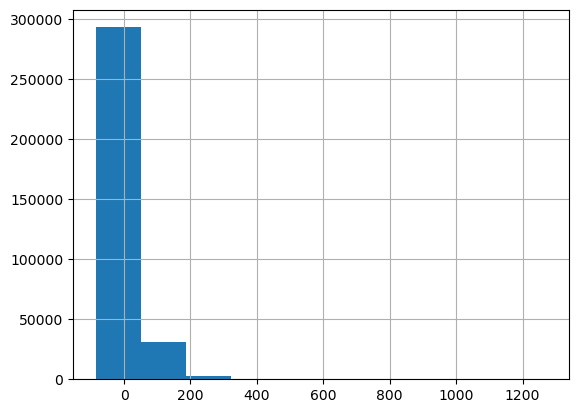

In [24]:
plt.figure();
df["arr_delay"].hist();

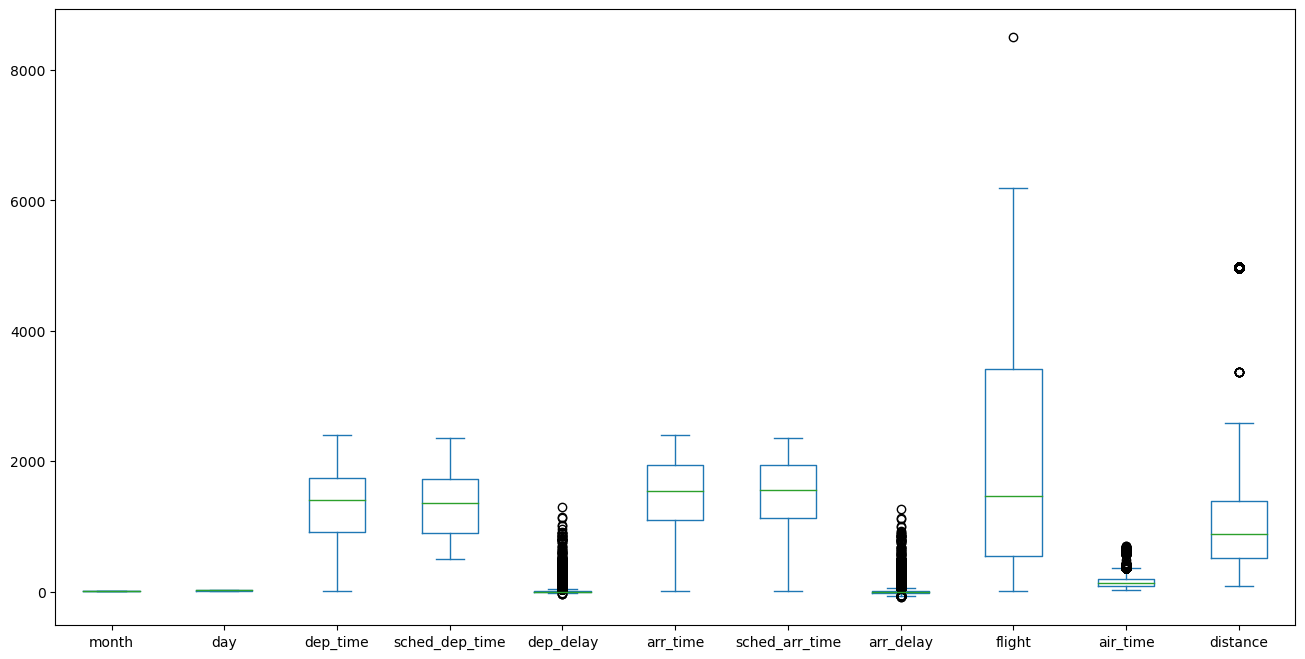

In [25]:
df.plot.box(figsize=(16, 8));

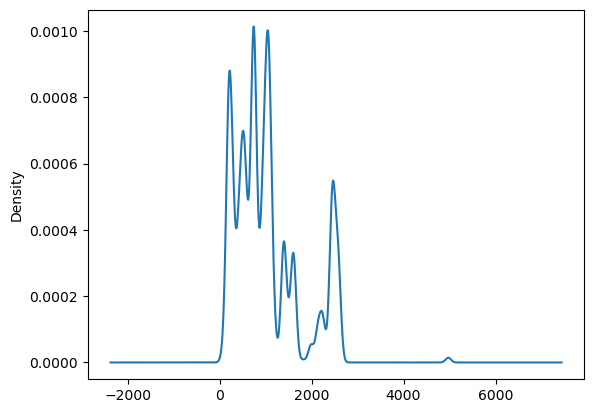

In [26]:
df['distance'].plot.kde();

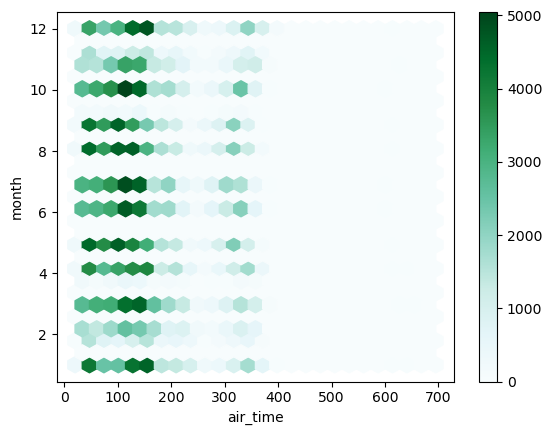

In [27]:
df.plot.hexbin(x="air_time", y="month", gridsize=25);

<div style=" padding: 40px; text-align: left; color: #535453;">
    Notebook by:
    <h2 style="font-family: 'calibri', sans-serif;ext-align: center;  font-size: 50px; margin-top: 0; margin-bottom: 20px;">
    Elyas Najafi
    </h2>
</div>

<h1 style="padding-top:50px;"><p style="background-color:#000;font-family:calibri;color:#FFF9ED;font-size:150%;text-align:center;border-radius:20px;">
Thanks For Your Attention
</p></h1>